<a href="https://colab.research.google.com/github/molecular-mar/molecular-mar.github.io/blob/master/Sesion9_4_PAQ24P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-learn
Es una biblioteca más de python ampliamente utilizada para el aprendizaje automático (machine learning). Ofrece herramientas simples y eficientes para el análisis de datos y modelado predictivo. Se construye sobre otras bibliotecas como NumPy, SciPy y matplotlib y proporciona una gran variedad de algoritmos para tareas de clasificación, regresión, clustering, reducción de dimensionalidad y selección de modelos.
Para saber más sobre estos algoritmos puedes visitar el [sitio web](https://scikit-learn.org/0.21/documentation.html)  y los siguientes libros: [1](https://www.nrigroupindia.com/e-book/Introduction%20to%20Machine%20Learning%20with%20Python%20(%20PDFDrive.com%20)-min.pdf) y [2](https://jakevdp.github.io/PythonDataScienceHandbook/).

En este curso nos enfocaremos en aprender la implementación y uso de regresiones lineales en python con la biblioteca Scikit-learn.



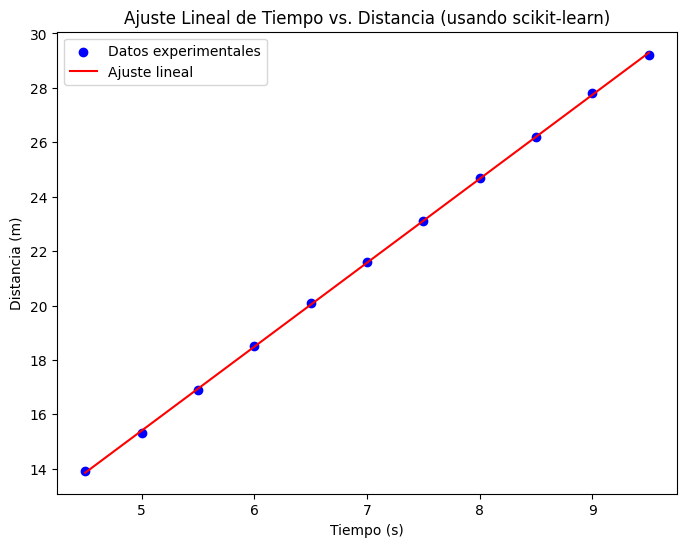

In [1]:
##Crear y cargar siempre todas las biliotecas al principio del notebbok

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos proporcionados
distancia = [13.9, 15.3, 16.9, 18.5, 20.1, 21.6, 23.1, 24.7, 26.2, 27.8, 29.2]
tiempo = [4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]

# Convertir las listas a arrays de NumPy y redimensionar el tiempo para scikit-learn
distancia_np = np.array(distancia)
# reshape(-1,1) convierte el arreglo de fila a columna
tiempo_np = np.array(tiempo).reshape(-1, 1)

# Crear y aplicar el modelo de regresión lineal
modelo = LinearRegression() #Crear
modelo.fit(tiempo_np, distancia_np) #Aplicar (x,y)

# Predecir los valores ajustados
distancia_predicha = modelo.predict(tiempo_np)

# Graficar los datos experimentales y la línea de mejor ajuste
plt.figure(figsize=(8, 6))
plt.scatter(tiempo, distancia, color='blue', label='Datos experimentales')
plt.plot(tiempo, distancia_predicha, color='red',
         label=f'Ajuste lineal')
plt.title('Ajuste Lineal de Tiempo vs. Distancia (usando scikit-learn)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (m)')
plt.legend()
plt.show()

## Datos del ajuste lineal

In [2]:
# Obtener la pendiente y la intersección
pendiente = modelo.coef_[0]
interseccion = modelo.intercept_

# Imprimir la pendiente y la intersección
print(f'Pendiente (Velocidad): {pendiente:.2f} m/s')
print(f'Intersección: {interseccion:.2f} m')

# Recordando que la ecuación de la recta es y=mx+b:
print(f'y = {pendiente:.2f}x + {interseccion:.2f}')

Pendiente (Velocidad): 3.09 m/s
Intersección: -0.04 m
y = 3.09x + -0.04


In [3]:
# Para estimar el coeficiente de correlación cuadrada R^2
r_cuadrado = modelo.score(tiempo_np, distancia_np)
print(f'Coeficiente de correlación (R^2): {r_cuadrado:.2f}')

Coeficiente de correlación (R^2): 1.00


## Caso de la vida real :(



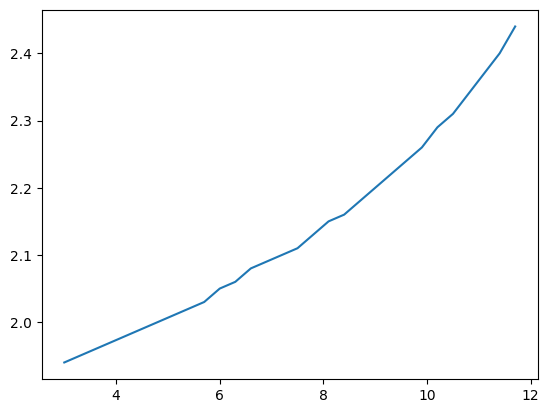

In [13]:
import pandas as pd
titulacion = pd.read_excel('datos_valoracion.xlsx',skiprows=1, skipfooter=15, sheet_name='Hoja1')
titulacion

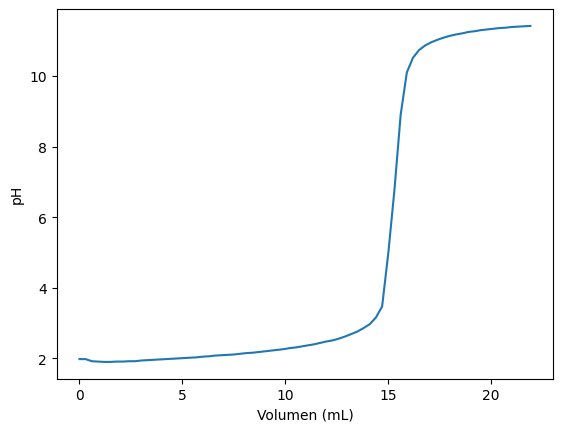

In [18]:
# Veamos el gráfico completo
plt.xlabel('Volumen (mL)')
plt.ylabel('pH')
plt.plot(titulacion.loc[:,'V'],titulacion.loc[:,'pH'])

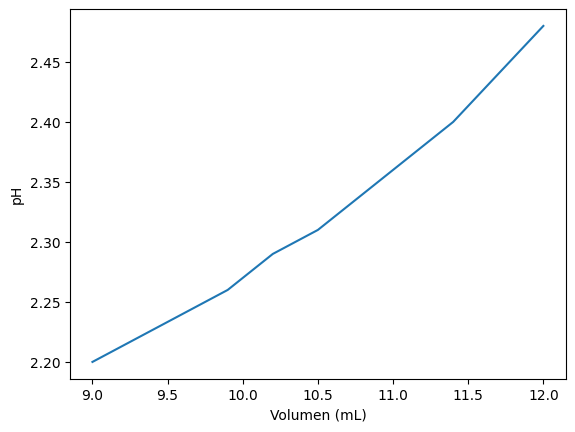

In [31]:
# Un acercamiento a la primera parte
plt.xlabel('Volumen (mL)')
plt.ylabel('pH')
plt.plot(titulacion.loc[30:40,'V'],titulacion.loc[30:40,'pH'])

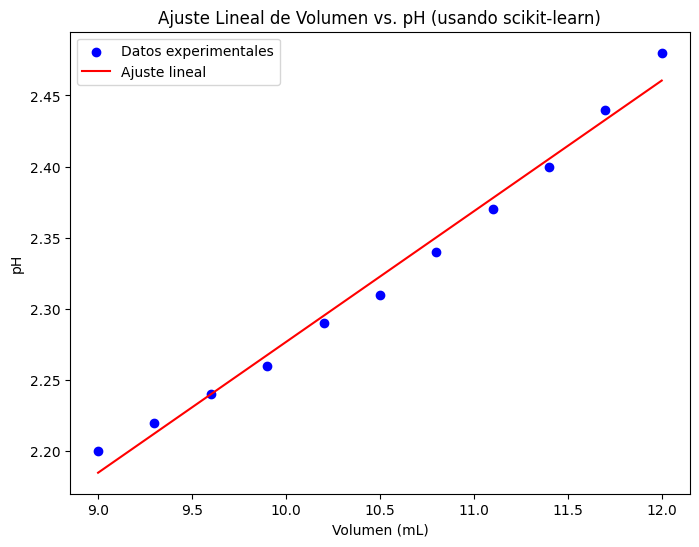

In [24]:
# Realicemos el ajuste lineal

# Convertir las listas a arrays de NumPy
# y redimensionar la variable independiente para scikit-learn
pH_np = np.array(titulacion.loc[30:40,'pH'])
volumen_np = np.array(titulacion.loc[30:40,'V']).reshape(-1, 1)

# Crear y aplicar el modelo de regresión lineal
modelo = LinearRegression() #Crear
modelo.fit(volumen_np, pH_np) #Aplicar (x,y)

# Predecir los valores ajustados
pH_predicho = modelo.predict(volumen_np)

# Graficar los datos experimentales y la línea de mejor ajuste
plt.figure(figsize=(8, 6))
plt.scatter(titulacion.loc[30:40,'V'], titulacion.loc[30:40,'pH'],
            color='blue', label='Datos experimentales')
plt.plot(titulacion.loc[30:40,'V'], pH_predicho, color='red',
         label=f'Ajuste lineal')
plt.title('Ajuste Lineal de Volumen vs. pH (usando scikit-learn)')
plt.xlabel('Volumen (mL)')
plt.ylabel('pH')
plt.legend()
plt.show()

In [25]:
# Para estimar el coeficiente de correlación cuadrada R^2
r_cuadrado = modelo.score(volumen_np, pH_np)
print(f'Coeficiente de correlación (R^2): {r_cuadrado:.2f}')

Coeficiente de correlación (R^2): 0.99


In [30]:
# Obtener la pendiente y la intersección
pendiente = modelo.coef_[0]
interseccion = modelo.intercept_

# Imprimir la pendiente y la intersección
print(f'Pendiente (pH/V): {pendiente:.2f} mL^-1')
print(f'Intersección: {interseccion:.2f} ')

# Recordando que la ecuación de la recta es y=mx+b:
print(f'y = {pendiente:.2f}x + {interseccion:.2f}')

Pendiente (pH/V): 0.09 mL$^-1$
Intersección: 1.36 
y = 0.09x + 1.36


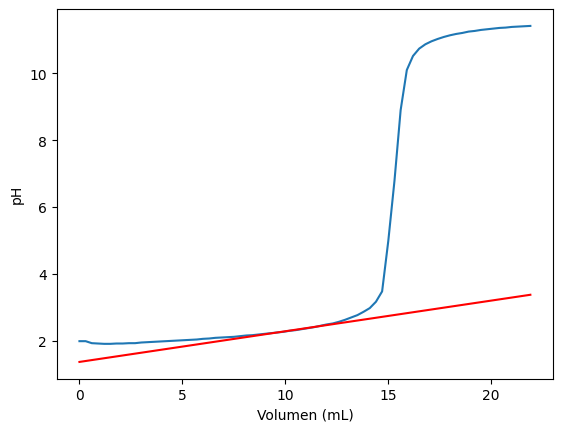

In [26]:
# En el gráfico completo
pH_predicho_todos = modelo.predict(np.array(titulacion.loc[:,'V']).reshape(-1, 1))
plt.xlabel('Volumen (mL)')
plt.ylabel('pH')
plt.plot(titulacion.loc[:,'V'],titulacion.loc[:,'pH'])
plt.plot(titulacion.loc[:,'V'],pH_predicho_todos,color='red')

❓Realiza un ajuste lineal para las otras dos secciones de la titulación, usando los siguientes intervalos de volumen y pH:

* Segunda sección: [48,54]
* Tercera sección: [60,70]

Obten la ecuación de cada recta y el coeficiente de correlación. Realiza las gráficas correspondientes, así como una gráfica con los datos originales y los tres ajustes lineales.